In [2]:
from os import name
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#load the iris dataset : https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
# read the data
cloumn_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv("Data/iris.data.txt", header=None, names=cloumn_names)
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
iris_df.shape
# x will have all the feature and Y is the result
x=iris_df.iloc[:, :-1]
y=iris_df.iloc[:, 4]


Devide the data into training and testing sets 70 for traning and 30 for testing

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)



Lets do data scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

x_train

array([[-0.4134164 , -1.46440146, -0.10014569, -0.32149987],
       [ 0.55122187, -0.49582097,  0.71771076,  0.35364985],
       [ 0.67180165,  0.2306144 ,  0.95138404,  0.75873969],
       [ 0.91296121, -0.01153072,  0.30878254,  0.21861991],
       [ 1.63643991,  1.44134002,  1.30189395,  1.7039493 ],
       [-0.17225683, -0.25367584,  0.1919459 ,  0.08358997],
       [ 2.11875905, -0.01153072,  1.59398554,  1.16382952],
       [-0.29283662, -0.01153072,  0.36720086,  0.35364985],
       [-0.89573553,  1.19919489, -1.443767  , -1.40173942],
       [ 2.23933883, -0.49582097,  1.65240385,  1.02879957],
       [-0.05167705, -0.73796609,  0.13352758, -0.32149987],
       [-0.77515575,  0.95704977, -1.443767  , -1.40173942],
       [-1.01631531,  1.19919489, -1.50218532, -1.26670948],
       [-0.89573553,  1.92563026, -1.15167541, -1.13167953],
       [-1.01631531, -2.43298195, -0.21698232, -0.32149987],
       [ 0.55122187, -0.73796609,  0.60087413,  0.75873969],
       [-1.25747488,  0.

Now we are traning the model with the help of Gaussian Naive Bayes of sklearn

In [6]:
from sklearn.naive_bayes import GaussianNB
clssfier = GaussianNB()
clssfier.fit(x_train, y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [7]:
y_pred=clssfier.predict(x_train)
acc=accuracy_score(y_train, y_pred)
print(acc)

0.9428571428571428


In [8]:
y_pred=clssfier.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

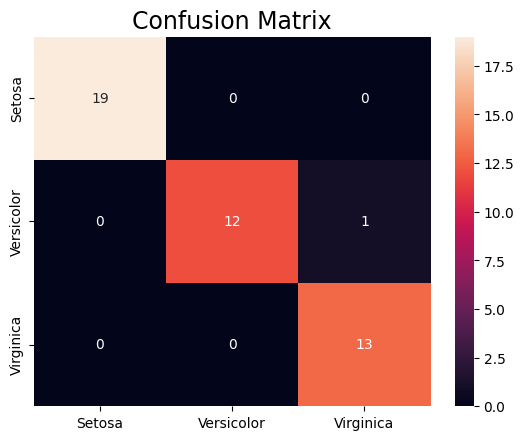

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])

#plt.ylabel('Prediction',fontsize=13)
#plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Matplotlib uses a "current figure" state machine: When you call plotting functions like plt.plot(), plt.title(), sns.heatmap(), etc., they draw onto the current active figure (and axes). Matplotlib tracks this internally.
plt.show() renders all open figures

row 1: Here all 19 setosa predicted correctly
row 2: 12 versicolor predicted correctly by one predcited as virginica
row 3: All 13 virginica predcited correctly

Precision : TP/(TP+FP)
Recall : TP/(TP+FN)
F1 Score : 2 * (Precision * Recall) / (Precision + Recall)
TP: True positive
TN: True negative
FP: False positive
FN: False negative

In [10]:
result1 = classification_report(y_test, y_pred)
print(result1)
result2=accuracy_score(y_test, y_pred)
print(result2)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

0.9777777777777777


SVM support vector Machine

In [ ]:
from sklearn.svm import SVC
accuracy_list=[]
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = SVC(kernel=i)
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_train)
    accuracy=accuracy_score(y_train,y_pred)
    accuracy_list.append(accuracy)
    print(f"Accuracy for {i} kernel: {accuracy}")

Accuracy for linear kernel: 0.9714285714285714
Accuracy for poly kernel: 0.9047619047619048
Accuracy for rbf kernel: 0.9619047619047619
Accuracy for sigmoid kernel: 0.8952380952380953


In [16]:
accurcies={'Linear': accuracy_list[0], 'Polynomial': accuracy_list[1], 
'RBF': accuracy_list[2], 'Sigmoid': accuracy_list[3]}
print(accurcies)

{'Linear': 0.9714285714285714, 'Polynomial': 0.9047619047619048, 'RBF': 0.9619047619047619, 'Sigmoid': 0.8952380952380953}


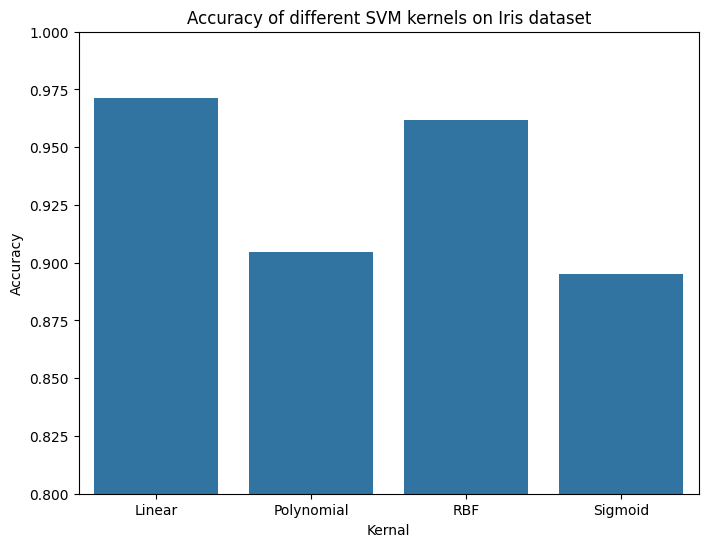

In [17]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(8, 6))
sns.barplot(x=list(accurcies.keys()), y=list(accurcies.values()))
pyplot.xlabel('Kernal')
pyplot.ylabel('Accuracy')
pyplot.title('Accuracy of different SVM kernels on Iris dataset')
pyplot.ylim(0.8, 1.0) # set y-axis limit for better visualization
pyplot.show()

In [18]:
accuracy_list=[]
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = SVC(kernel=i)
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy)
    print(f"Accuracy for {i} kernel: {accuracy}")

Accuracy for linear kernel: 0.9777777777777777
Accuracy for poly kernel: 0.9555555555555556
Accuracy for rbf kernel: 1.0
Accuracy for sigmoid kernel: 0.8888888888888888


In [19]:
accurcies={'Linear': accuracy_list[0], 'Polynomial': accuracy_list[1], 
'RBF': accuracy_list[2], 'Sigmoid': accuracy_list[3]}


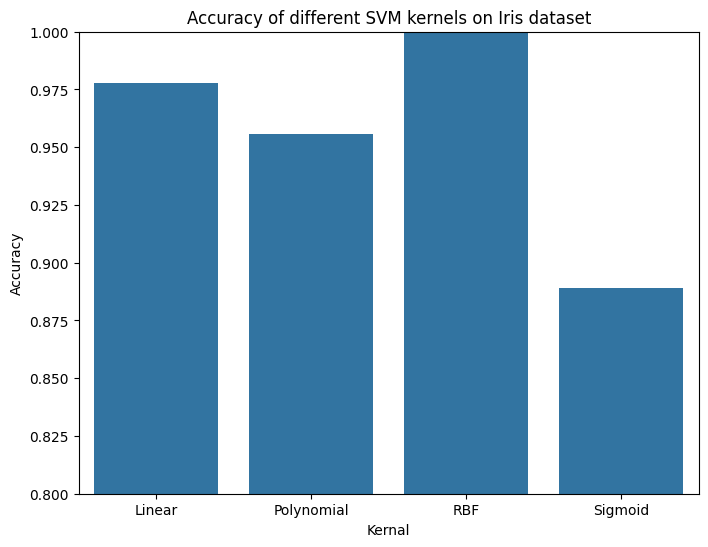

In [20]:
pyplot.figure(figsize=(8, 6))
sns.barplot(x=list(accurcies.keys()), y=list(accurcies.values()))
pyplot.xlabel('Kernal')
pyplot.ylabel('Accuracy')
pyplot.title('Accuracy of different SVM kernels on Iris dataset')
pyplot.ylim(0.8, 1.0) # set y-axis limit for better visualization
pyplot.show()

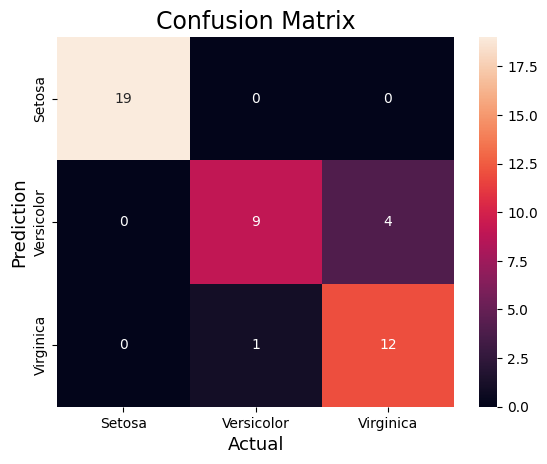

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

K Nearset Neighbors (KNN)
KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7) # K value 7
clf.fit(x_train, y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",8
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [31]:
y_pred=clf.predict(x_train)
accuracy=accuracy_score(y_train, y_pred)
print(accuracy)

0.9428571428571428


In [ ]:
clf = KNeighborsClassifier(n_neighbors=10) # K value 10
clf.fit(x_train, y_train)
y_pred=clf.predict(x_train)
accuracy=accuracy_score(y_train, y_pred)
print("Training Accuracy: with K = 10 ->", accuracy)

Training Accuracy: with K = 10 -> 0.9333333333333333


In [35]:
clf = KNeighborsClassifier(n_neighbors=8) # K value 8
clf.fit(x_train, y_train)
y_pred=clf.predict(x_train)
accuracy=accuracy_score(y_train, y_pred)
print("Training Accuracy: with K = 8 ->", accuracy)

Training Accuracy: with K = 8 -> 0.9428571428571428


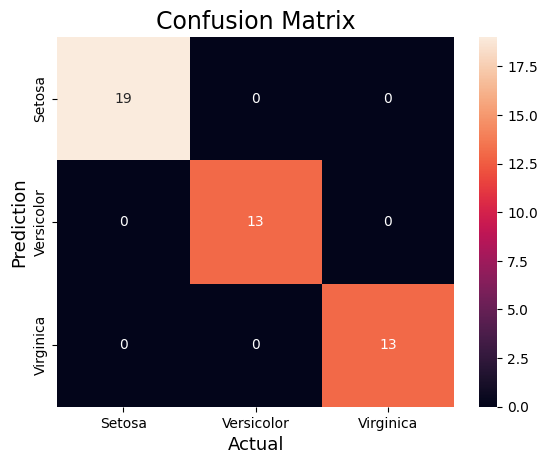

In [36]:
y_pred=clf.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
